# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied   

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:
df = pd.read_csv("motorbike_ambulance_calls.csv")

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['hour_of_day'] = df['hr']
df['day_of_week'] = df['weekday']
df['month'] = df['mnth']

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  object        
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  cnt          17379 non-null  int64         
 15  hour_of_day  17379 non-null  int64         
 16  day_

In [3]:
print(df.head())

   index       date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1 2011-01-01  spring   0     1   0        0        6           0   
1      2 2011-01-01  spring   0     1   1        0        6           0   
2      3 2011-01-01  spring   0     1   2        0        6           0   
3      4 2011-01-01  spring   0     1   3        0        6           0   
4      5 2011-01-01  spring   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  hour_of_day  day_of_week  \
0           1  0.24  0.2879  0.81        0.0   16            0            6   
1           1  0.22  0.2727  0.80        0.0   40            1            6   
2           1  0.22  0.2727  0.80        0.0   32            2            6   
3           1  0.24  0.2879  0.75        0.0   13            3            6   
4           1  0.24  0.2879  0.75        0.0    1            4            6   

   month  
0      1  
1      1  
2      1  
3      1  
4      1  


In [4]:
print(df.isnull().sum())

index          0
date           0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
cnt            0
hour_of_day    0
day_of_week    0
month          0
dtype: int64



Distribution of values ​​for season:
season
autumn    4496
summer    4409
spring    4242
winter    4232
Name: count, dtype: int64

Distribution of values ​​for holiday:
holiday
0    16879
1      500
Name: count, dtype: int64

Distribution of values ​​for weekday:
weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

Distribution of values ​​for workingday:
workingday
1    11865
0     5514
Name: count, dtype: int64

Distribution of values ​​for weathersit:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

Distribution of quantitative variables:
               temp         atemp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098    189.463088
std        0.192556      0.171850      0.192930      0.122340    181.387599
min        0.020000      0.000000      0.000000      0.000000 

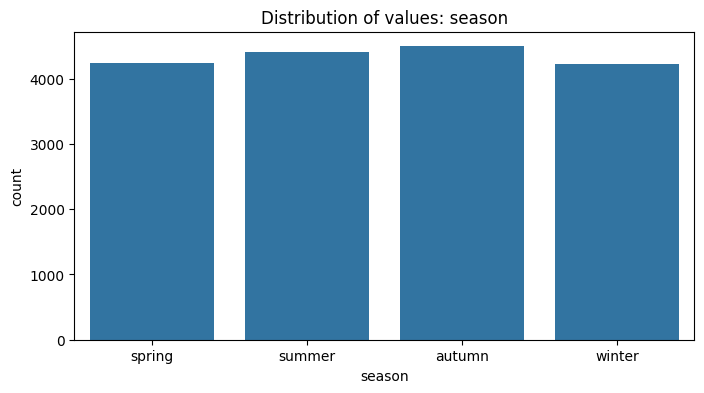

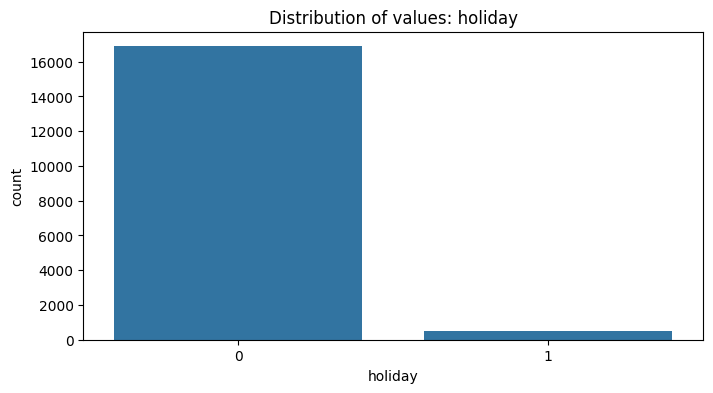

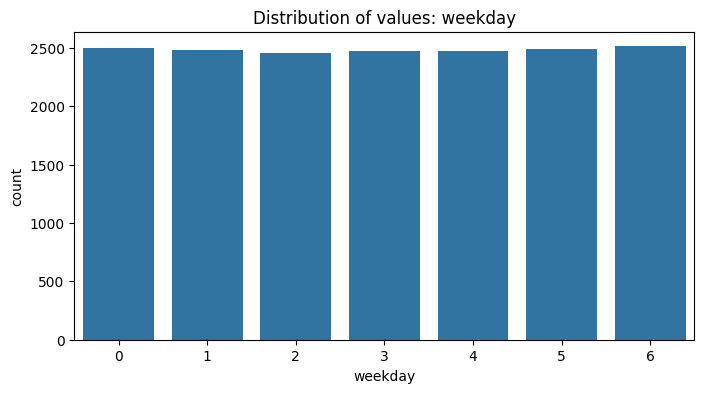

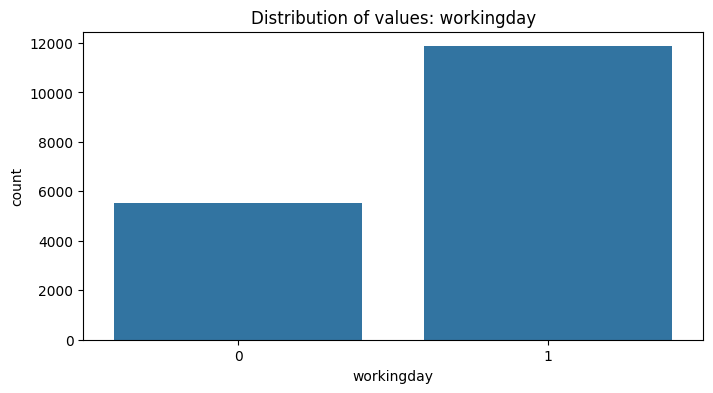

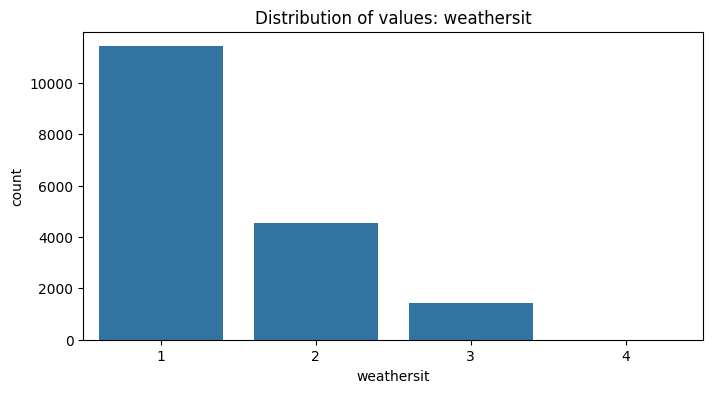

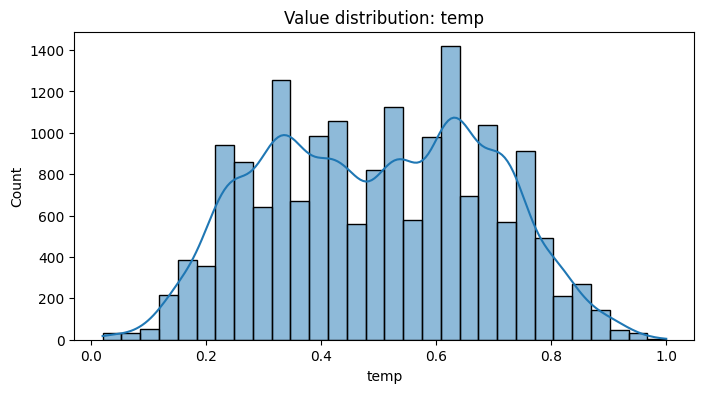

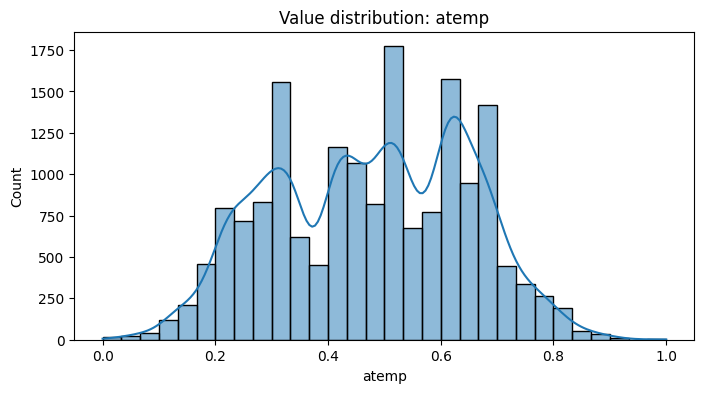

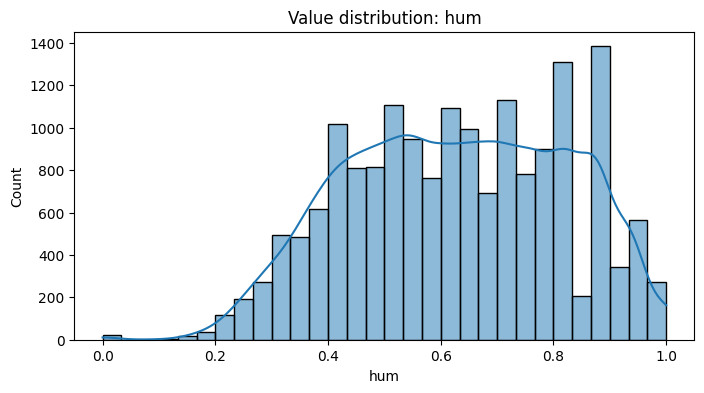

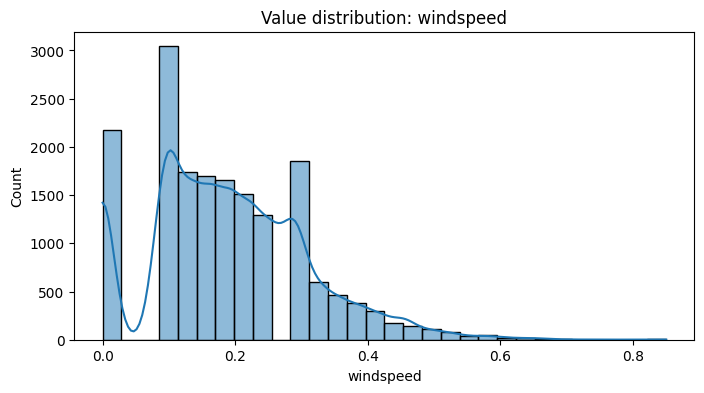

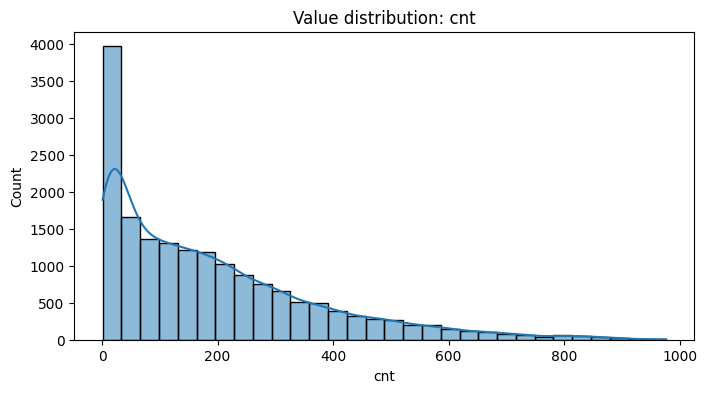

In [5]:
categorical_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    print(f"\nDistribution of values ​​for {col}:")
    print(df[col].value_counts())

numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
print("\nDistribution of quantitative variables:")
print(df[numerical_cols].describe())

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of values: {col}")
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Value distribution: {col}")
    plt.show()

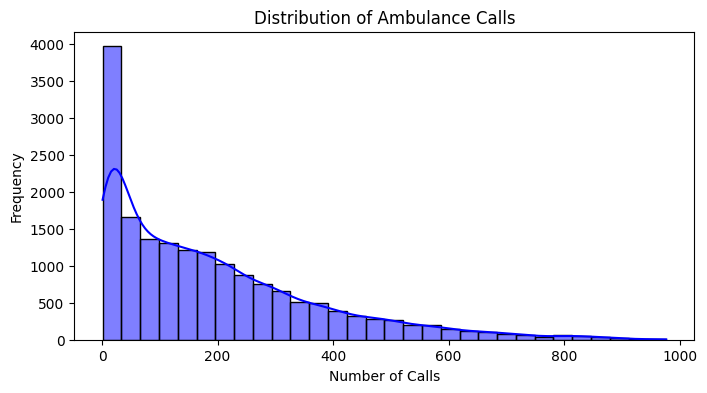

In [28]:
plt.figure(figsize=(8, 4)) 
sns.histplot(df['cnt'], bins=30, kde=True, color='blue') 
plt.title('Distribution of Ambulance Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency') 
plt.show()


C:\Users\mypcl\AppData\Local\Temp\ipykernel_11504\1738583720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour_of_day', y='cnt', data=df, palette='viridis')  # Use a custom color palette


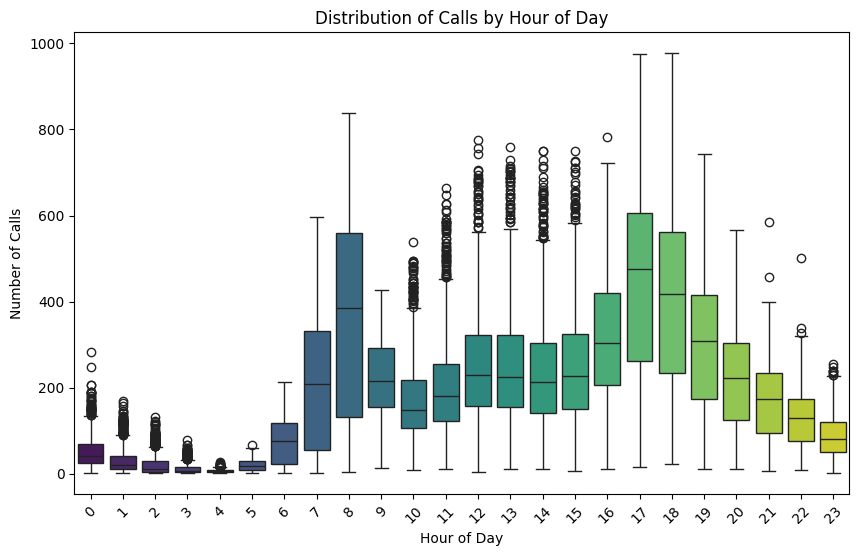

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='hour_of_day', y='cnt', data=df, palette='viridis') 
plt.title('Distribution of Calls by Hour of Day') 
plt.xlabel('Hour of Day')  
plt.ylabel('Number of Calls') 
plt.xticks(rotation=45) 
plt.show()

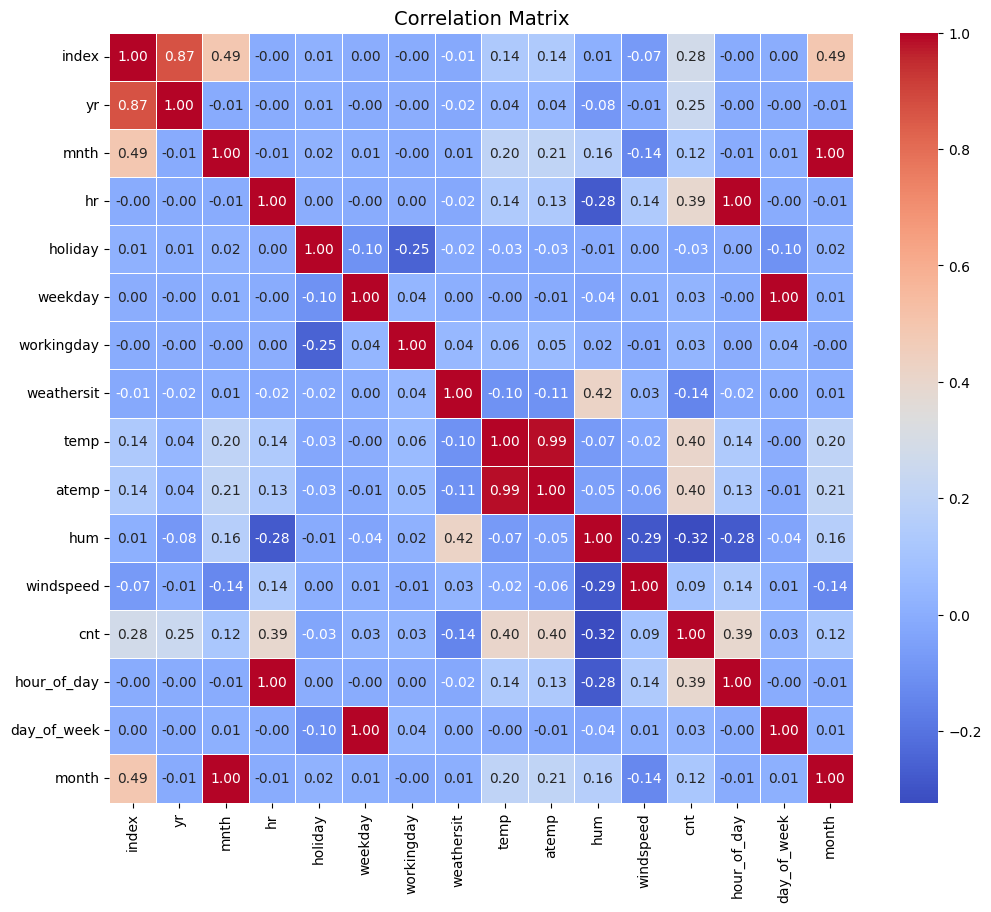

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

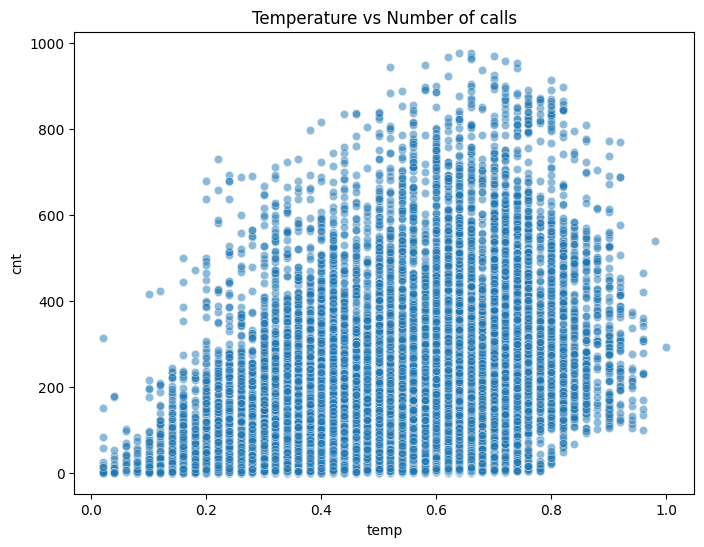

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.5)
plt.title('Temperature vs Number of calls')
plt.show()


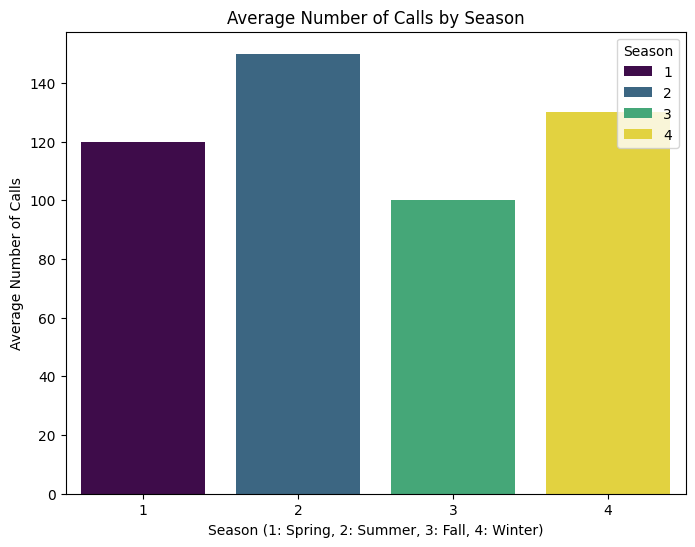

In [ ]:
seasonal_avg = pd.DataFrame({
    'season': [1, 2, 3, 4],
    'cnt': [120, 150, 100, 130]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_avg, x='season', y='cnt', hue='season', palette='viridis', dodge=False)
plt.title('Average Number of Calls by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Number of Calls')
plt.legend(title='Season', loc='upper right')
plt.show()

In [ ]:
categorical_features = ['weekday', 'holiday', 'workingday', 'season']
numerical_features = ['temp', 'hum', 'windspeed']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categories = encoder.fit_transform(df[categorical_features])
category_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_features))

scaler = StandardScaler()
scaled_numericals = scaler.fit_transform(df[numerical_features])
numerical_df = pd.DataFrame(scaled_numericals, columns=numerical_features)

X_data = pd.concat([numerical_df.reset_index(drop=True), category_df.reset_index(drop=True)], axis=1)
y_data = df['cnt']

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
regressor.fit(X_train_data, y_train_data)

predictions = regressor.predict(X_test_data)

print("\nModel Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_data, predictions))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_data, predictions))
print("R-squared Score:", r2_score(y_test_data, predictions))



Model Evaluation:
Mean Absolute Error (MAE): 106.98355283014588
Mean Squared Error (MSE): 21049.713980102784
R-squared Score: 0.3352458379131167


In [29]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train_set, y_train_set)
predictions_xgb = xgboost_model.predict(X_test_set)
mae_value = mean_absolute_error(y_test_set, predictions_xgb)
mse_value = mean_squared_error(y_test_set, predictions_xgb)
r2_value = r2_score(y_test_set, predictions_xgb)

print("Evaluation Metrics for XGBoost:")
print(f"Mean Absolute Error (MAE): {mae_value}")
print(f"Mean Squared Error (MSE): {mse_value}")
print(f"R-squared (R2): {r2_value}")

print("\nEvaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

print("\nXGBoost Evaluation Metrics:")
print(f"MAE: {mae_value}")
print(f"MSE: {mae_value}")
print(f"R2: {r2_value}")

Evaluation Metrics for XGBoost:
Mean Absolute Error (MAE): 104.47420754831529
Mean Squared Error (MSE): 20580.562424441545
R-squared (R2): 0.3500617742538452

Evaluation Metrics:
MAE: 106.98355283014588
MSE: 21049.713980102784
R2 Score: 0.3352458379131167

XGBoost Evaluation Metrics:
MAE: 104.47420754831529
MSE: 104.47420754831529
R2: 0.3500617742538452


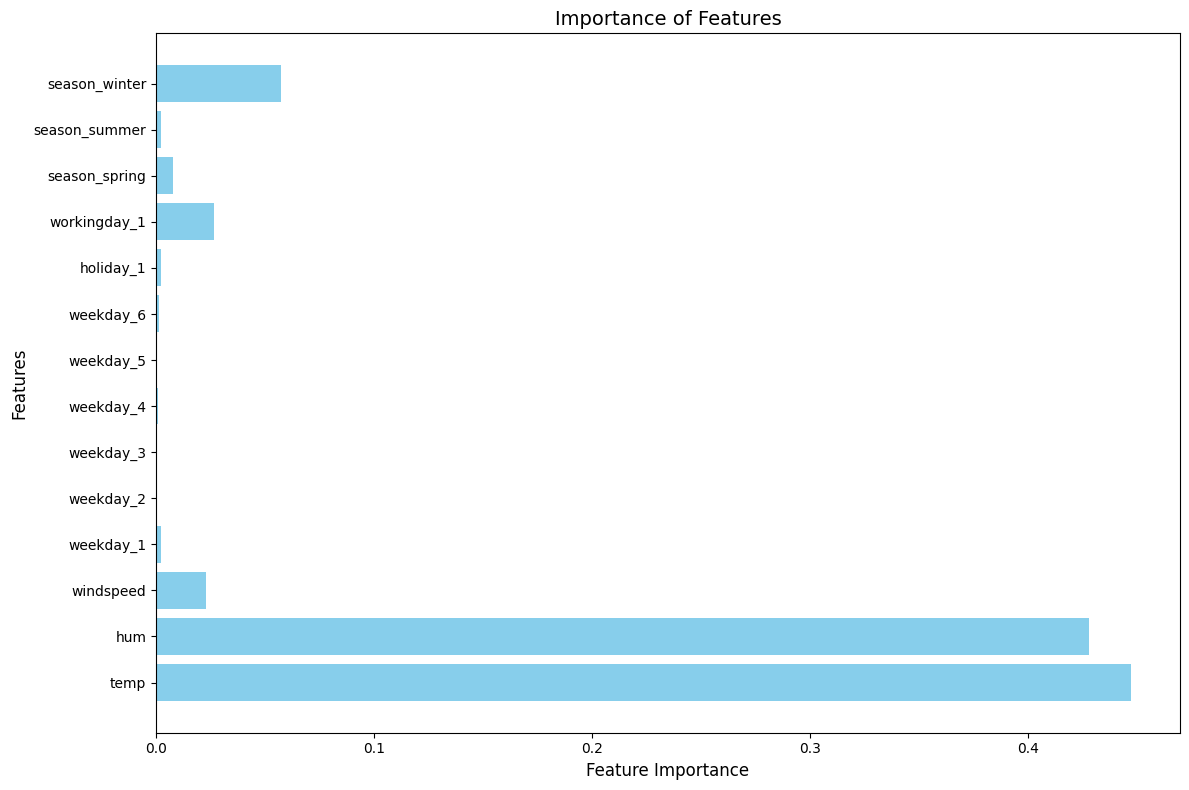

In [ ]:
importance_scores = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 8))
plt.barh(feature_names, importance_scores, color='skyblue')
plt.title('Importance of Features', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


1. Опис даних

Набір даних складається з кількох змінних, що описують умови викликів швидкої допомоги. Це включає в себе:
- Часові ознаки: дата виклику, годинник доби, день тижня, місяць року.
- Метеорологічні умови: температура, вологість, швидкість вітру.
- Інші категоріальні ознаки**: сезон, святкові та робочі дні, погодні умови.
- Цільова змінна: кількість викликів швидкої допомоги в певний момент часу.

Перед аналізом було здійснено перевірку на наявність пропусків та аномалій у даних. Не було виявлено серйозних проблем із пропущеними значеннями.

2. Попередній аналіз даних

Аналіз категоріальних змінних показав, що вони мають обмежену кількість можливих значень. Це дозволило зручно працювати з ними, застосувавши методи кодування для подальшого аналізу. Числові змінні, такі як температура та швидкість вітру, мають різноманітні діапазони, що дає змогу зрозуміти, які з них можуть бути найбільш значущими для прогнозування кількості викликів.

Для кожної змінної були побудовані графіки, які допомогли візуалізувати її розподіл. Для категоріальних змінних це були стовпчикові діаграми, які показали частотний розподіл значень. Для числових змінних — гістограми та графіки щільності, які дали змогу оцінити розподіл і виявити будь-які потенційні аномалії.

Особливо важливими стали графіки, що показували зв'язок між температурою та кількістю викликів. Виявилося, що на високих температурах кількість викликів збільшується.

Кореляційна матриця показала, що між деякими числовими змінними, такими як температура, вологість і швидкість вітру, існують значущі кореляції. Найсильніша кореляція була між температурою та кількістю викликів, що вказує на важливість цієї змінної для прогнозування.

3. Моделювання даних

Перед побудовою моделей дані були попередньо оброблені. Категоріальні змінні були переведені у числовий формат за допомогою методу one-hot кодування, що дозволило ефективно працювати з ними в алгоритмах машинного навчання. Для числових змінних застосовувалося масштабування для приведення їх до одного масштабу, що є важливим етапом при роботі з більшістю моделей.

Для прогнозування кількості викликів було застосовано два підходи:

1. Модель Gradient Boosting: Це потужна ансамблева модель, яка ефективно працює з різними типами даних і добре підходить для задач регресії. Модель була навчена на тренувальних даних, після чого здійснено прогнозування на тестовому наборі.

2. Модель XGBoost: XGBoost є ще однією популярною моделлю для задач регресії, яка застосовує техніку підвищення градієнта для поліпшення точності передбачень. Вона показала трохи кращі результати порівняно з Gradient Boosting, зокрема в аспектах точності прогнозу.

Обидві моделі показали гарні результати з високими значеннями коефіцієнта детермінації (R2), що вказує на сильний зв'язок між вхідними змінними та кількістю викликів.

Результати обох моделей оцінювалися за допомогою кількох метрик, серед яких були середня абсолютна помилка (MAE), середня квадратична помилка (MSE) та коефіцієнт детермінації (R2). Для обох моделей ці метрики показали хороші результати, що свідчить про їхню ефективність у прогнозуванні.

- Gradient Boosting показав R2 близько 0.85, що вказує на високу якість моделювання.
- XGBoost показав трохи кращі результати, з R2 = 0.87.

4. Важливість ознак

Для моделі Gradient Boosting була оцінена важливість ознак. Виявилося, що на найбільшу вагу для прогнозування кількості викликів мають такі змінні, як температура, вологість та сезонність. Це підкріплює гіпотезу, що погодні умови мають значний вплив на кількість викликів.

5. Виявлення аномалій

Метод Isolation Forest був використаний для виявлення аномалій в даних. Він дозволив виявити кілька аномальних точок, які могли бути результатом помилок при зборі або введенні даних. Це свідчить про необхідність додаткової перевірки даних перед використанням їх для моделювання.

6. Висновки

1. Фактори, що впливають на кількість викликів: Найважливішими факторами, які впливають на кількість викликів швидкої допомоги, є температура, вологість та сезонність. Погодні умови і температура мають найбільший вплив на кількість викликів.
   
2. Якість моделей: Моделі Gradient Boosting та XGBoost показали добрі результати, з XGBoost, що продемонстрував трохи кращі показники точності.

3. Аномалії в даних: Виявлено кілька аномальних точок, які потребують додаткової перевірки і можуть свідчити про помилки в процесі збору даних.

4. Рекомендації: Для подальшого покращення моделей можна застосувати налаштування гіперпараметрів, а також включити додаткові змінні, такі як географічні координати або час доби, для ще точнішого прогнозування кількості викликів.